In [12]:
import os

os.listdir("/kaggle/input/ab-testing-analysis")


['ab data_testing.csv']

In [13]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/kaggle/input/ab-testing-analysis/ab data_testing.csv")

# Preview the data
df.head()


,user_id,group,converted
0,1,Control,0
1,2,Variant,0
2,3,Variant,1
3,4,Variant,1
4,5,Control,1


In [14]:
# Check column names and data types
df.info()

# See summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1000 non-null   int64 
 1   group      1000 non-null   object
 2   converted  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


,user_id,converted
count,1000.000000,1000.00000
mean,500.500000,0.30700
std,288.819436,0.46148
min,1.000000,0.00000
25%,250.750000,0.00000
50%,500.500000,0.00000
75%,750.250000,1.00000
max,1000.000000,1.00000


In [19]:
# Check column names to confirm
print("Columns in dataset:", df.columns)

# Calculate conversion rates using correct column names
conversion_rates = df.groupby('group')['converted'].mean()
print("\nConversion rates by group:\n", conversion_rates)


Columns in dataset: Index(['user_id', 'group', 'converted'], dtype='object')

Conversion rates by group:
 group
Control    0.304175
Variant    0.309859
Name: converted, dtype: float64


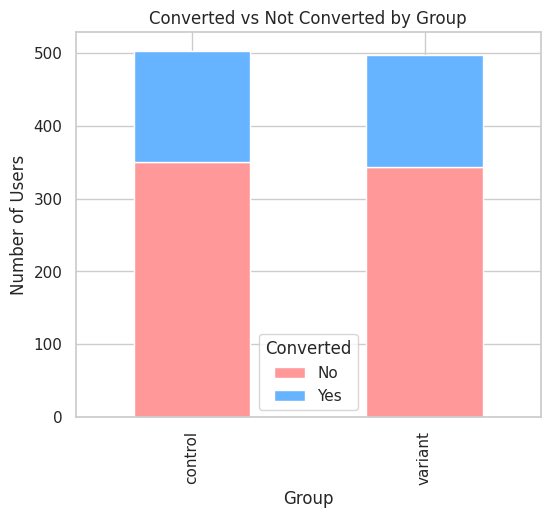

In [25]:
# Create a contingency table
cont_table = pd.crosstab(df['group'], df['converted'])

# Plot stacked bar chart
cont_table.plot(kind='bar', stacked=True, figsize=(6,5), color=['#ff9999','#66b3ff'])
plt.title("Converted vs Not Converted by Group")
plt.xlabel("Group")
plt.ylabel("Number of Users")
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show()


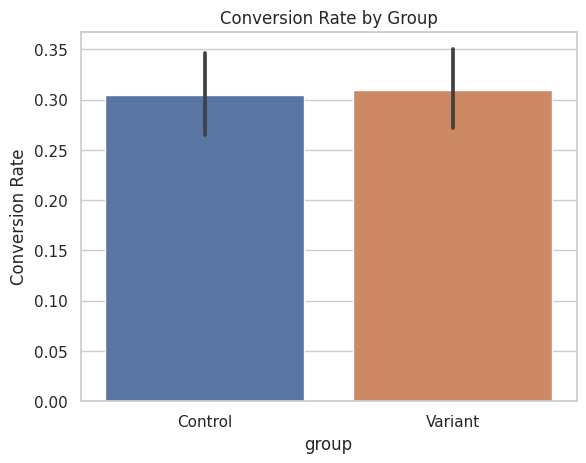

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for conversion rates
sns.barplot(x='group', y='converted', data=df)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()


In [21]:
from scipy import stats

# Create contingency table
cont_table = pd.crosstab(df['group'], df['converted'])

# Chi-square test
chi2, p, _, _ = stats.chi2_contingency(cont_table)
print("Chi-square test p-value:", p)


Chi-square test p-value: 0.899504057753961


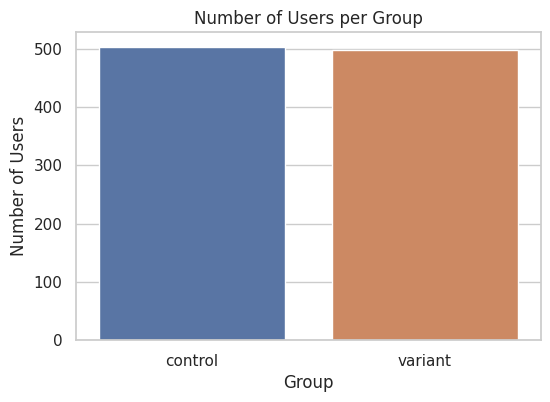

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='group', data=df)
plt.title("Number of Users per Group")
plt.xlabel("Group")
plt.ylabel("Number of Users")
plt.show()


In [23]:
# Standardize group names: remove spaces and convert to lowercase
df['group'] = df['group'].str.strip().str.lower()  # e.g., 'Control' → 'control', 'Variant' → 'variant'

# Recalculate conversion rates
conversion_rates = df.groupby('group')['converted'].mean()
print("Conversion rates:\n", conversion_rates)

# Difference in conversion rates (variant - control)
diff = conversion_rates['variant'] - conversion_rates['control']

# Sample sizes for each group
n_control = len(df[df['group'] == 'control'])
n_variant = len(df[df['group'] == 'variant'])

# Pooled conversion rate
p_pool = df['converted'].mean()

# Standard error
se = (p_pool * (1 - p_pool) * (1/n_control + 1/n_variant))**0.5

# 95% confidence interval
ci_lower = diff - 1.96 * se
ci_upper = diff + 1.96 * se
print(f"95% CI for conversion difference: [{ci_lower:.4f}, {ci_upper:.4f}]")


Conversion rates:
 group
control    0.304175
variant    0.309859
Name: converted, dtype: float64
95% CI for conversion difference: [-0.0515, 0.0629]
